In [1]:
import scqubits as scq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
scq.GUI()

Container(children=[Sheet(children=[Card(children=[Img(layout=None, src='data:image/png;base64,iVBORw0KGgoAAAA…

## Exercise 3

### Reproduce panels (a), (b), and (c) from Fluxonium paper:

In [3]:
# Define the fluxonium qubit using parameters from Blueprint
fluxonium = scq.Fluxonium(EJ = 4,
                               EC = 1,
                               EL = 1,
                               flux = 0.50,
                               cutoff = 10)

In [4]:
# We take the first 3 energy eigenvalues as a function of flux
spec = fluxonium.get_spectrum_vs_paramvals('flux', np.linspace(0, 1, 100), evals_count=3)

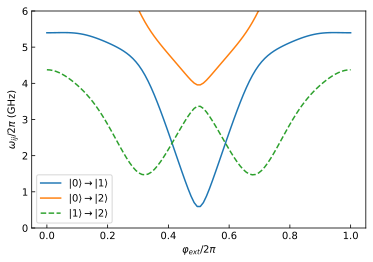

In [5]:
import os

# Plot the energy levels where ground state is subtracted
plt.figure()
plt.plot(spec.param_vals, spec.energy_table[:,1] - spec.energy_table[:,0], '-', label=r'$|0\rangle \rightarrow |1\rangle$')
plt.plot(spec.param_vals, spec.energy_table[:,2] - spec.energy_table[:,0], '-', label=r'$|0\rangle \rightarrow |2\rangle$')
plt.plot(spec.param_vals, spec.energy_table[:,2] - spec.energy_table[:,1], '--', label=r'$|1\rangle \rightarrow |2\rangle$')

plt.ylim(0,6)
plt.legend()
plt.xlabel(r'$\varphi_{ext}/ 2 \pi$')
plt.ylabel(r'$\omega_{ij} / 2\pi$ (GHz)')
plt.tick_params(which='both', direction='in')

plt.savefig('fluxonium_spectrum.jpg', dpi=300)

plt.show()

In [6]:
# f01 = w01 / 2pi
f01 = min(spec.energy_table[:,1] - spec.energy_table[:,0])

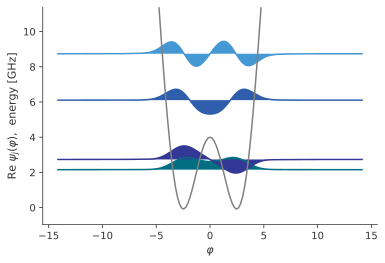

In [7]:
# To reproduce (b) we simply use the plot_wavefunction method
fluxonium.plot_wavefunction(which=[0,1,2,3], mode='real')
plt.savefig('fluxonium_wavefunctions.jpg', dpi=300)
plt.show()

Using SCQubits, it is also a simple task to reproduce panel (c):

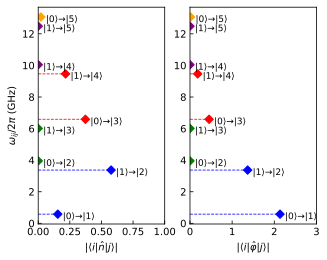

In [8]:
matelms_n = fluxonium.get_matelements_vs_paramvals(operator='n_operator', param_name='flux', param_vals=[0.5], evals_count=6).matrixelem_table
matelms_phi = fluxonium.get_matelements_vs_paramvals(operator='phi_operator', param_name='flux', param_vals=[0.5], evals_count=6).matrixelem_table
matelms_n = np.abs(matelms_n)
matelms_phi = np.abs(matelms_phi)

fs = fluxonium.get_spectrum_vs_paramvals('flux', [0.5], evals_count=6).energy_table.flatten()
frequencies = [fs[1]-fs[0], fs[2]-fs[1], fs[2]-fs[0], fs[3]-fs[1], fs[3]-fs[0], fs[4]-fs[1], fs[4]-fs[0], fs[5]-fs[1], fs[5]-fs[0]]

matrix_elements_n = [matelms_n[:,0,1], matelms_n[:,1,2], matelms_n[:,0,2], matelms_n[:,1,3], matelms_n[:,0,3], matelms_n[:,1,4], matelms_n[:,0,4], matelms_n[:,1,5], matelms_n[:,0,5]]
matrix_elements_phi = [matelms_phi[:,0,1], matelms_phi[:,1,2], matelms_phi[:,0,2], matelms_phi[:,1,3], matelms_phi[:,0,3], matelms_phi[:,1,4], matelms_phi[:,0,4], matelms_phi[:,1,5], matelms_phi[:,0,5]]

# States for legend annotations
states = [r'$|0\rangle \to |1\rangle$', r'$|1\rangle \to |2\rangle$', r'$|0\rangle \to |2\rangle$', 
          r'$|1\rangle \to |3\rangle$', r'$|0\rangle \to |3\rangle$', r'$|1\rangle \to |4\rangle$', 
          r'$|1\rangle \to |4\rangle$', r'$|1\rangle \to |5\rangle$', r'$|0\rangle \to |5\rangle$',]

# Markers and colors for each transition
markers = ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
colors = ['blue', 'blue', 'green', 'green', 'red', 'red', 'purple', 'purple', 'orange']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 4))

# Left plot:
for i, (freq, elem_n) in enumerate(zip(frequencies, matrix_elements_n)):
    ax1.plot(elem_n, freq, marker=markers[i], color=colors[i], linestyle='--', label=states[i])
    ax1.axhline(y=freq, xmin=0, xmax=elem_n, color=colors[i], linestyle='--', linewidth=0.8)  # Horizontal line
    ax1.annotate(states[i], (elem_n, freq), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=9)

# Right plot:
for i, (freq, elem_phi) in enumerate(zip(frequencies, matrix_elements_phi)):
    ax2.plot(elem_phi, freq, marker=markers[i], color=colors[i], linestyle='--', label=states[i])
    ax2.axhline(y=freq, xmin=0, xmax=elem_phi/3, color=colors[i], linestyle='--', linewidth=0.8)  # Horizontal line
    ax2.annotate(states[i], (elem_phi, freq), textcoords="offset points", xytext=(5,-5), ha='left', fontsize=9)

ax1.set_xlabel(r'$|\langle i | \hat{n} | j \rangle|$')
ax1.set_ylabel(r'$\omega_{ij}/2\pi$ (GHz)')
ax1.set_xlim(0, 1)
ax1.tick_params(which='both', direction='in')

ax2.set_xlabel(r'$|\langle i | \hat{\varphi} | j \rangle|$')
ax2.set_xlim(0, 3)
ax2.tick_params(which='both', direction='in')

plt.savefig('fluxonium_matrix_elements.jpg', dpi=300)
plt.show()


In [9]:
frequencies = fluxonium.get_spectrum_vs_paramvals('flux', [0.5], evals_count=6)
frequencies = frequencies.energy_table.flatten()
frequencies[1] - frequencies[0]

0.5793403685801035

### $T_1$ due to dielectric loss
See App. A1 where Fermi's Golden Rule is applied:

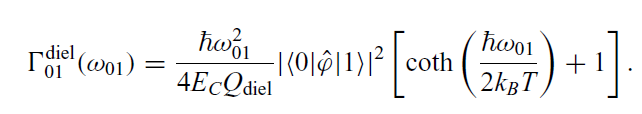

where the effective dielectric loss quality factor $Q_{diel}$ is found to be $5 \times 10^6$. The effective temperature is assumed to be $T=$ 20mK.

Furthermore, we have to be careful with the units and orders of magnitude: When we write $E_C = 1$ GHz, this is actually $E_C/h=f_C=1$ GHz. Similarly, $\omega_{01}/2\pi=f_{01}=5$ Ghz. We obtain:

$ \Gamma_{01}^{diel} (\omega_{01}) = \frac{\hbar (\overbrace{\omega_{01}/2\pi}^{f_{01}})^2 \cdot (2\pi)^2}{4 (\underbrace{E_C / h}_{f_C}) h Q_{diel}} |{\bra{0}\hat{\varphi}\ket{1}}|^2 \left[ \text{coth}\left(\frac{\hbar 2\pi f_{01}}{2K_B T}\right) + 1 \right] = \frac{2\pi f_{01}^2}{4 f_C Q_{diel}} |{\bra{0}\hat{\varphi}\ket{1}}|^2 \left[ \text{coth}\left(\frac{\hbar 2\pi f_{01}}{2K_B T}\right) + 1 \right]$

In [12]:
# Define coth function
def coth(x):
    return np.cosh(x)/np.sinh(x)

# Define the T1 function as 1/Gamma_01 where frequency f01 is in GHz, so the function returns T1 in ns
def T1(f01, matr_el):
    Q_diel = 5e6
    T = 0.02
    hbar = 1.0545718e-34
    K_B = 1.38064852e-23
    f_C = 1

    return 1/((2*np.pi*f01**2)/(4*f_C*Q_diel) * np.abs(matr_el)**2 * (coth(hbar*2*np.pi*f01/(2*K_B*T)) + 1))

Expected values for 4,1,1 Fluxonium at half-flux quantum:

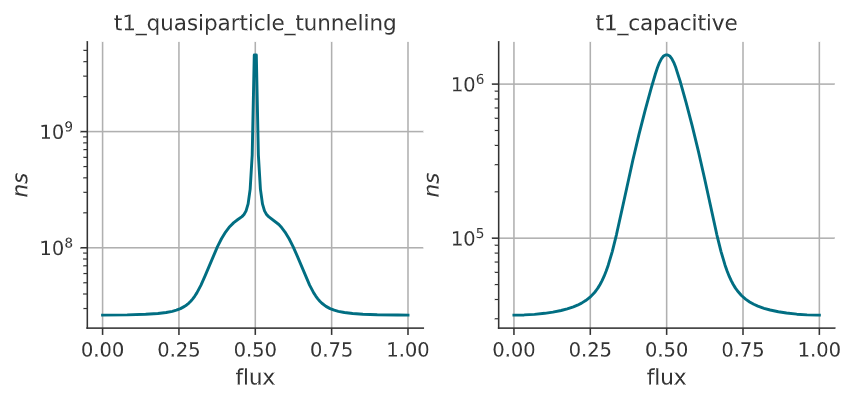

$|\bra{i} \hat{\varphi} \ket{j}|$

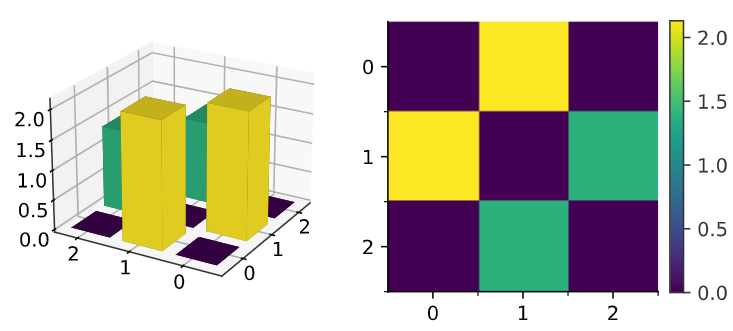

In [13]:
# d is the resolution of the plot
d = 8
# n is the maximum EJ value we consider (plots run from 1 to n in EJ)
EJ_max = 8

# In order to plot a contour plot of T1, we need to define functions that return omega_01 and the matrix element for a given EJ and EL
# We use the build-in parameter sweep, but we can only sweep in one dimension. Therefore, we sweep in EJ and call the functions for EL in the loop
def get_matr_elem2(EL, n):
    return scq.Fluxonium(EJ = 4, EC = 1, EL = EL, flux = 0.50, cutoff=20).get_matelements_vs_paramvals(operator='phi_operator', param_name='EJ', param_vals=np.linspace(1,EJ_max,d), evals_count=2).matrixelem_table[:,0,1]

def get_omega(EL, n):
    return scq.Fluxonium(EJ = 4, EC = 1, EL = EL, flux = 0.50, cutoff=20).get_spectrum_vs_paramvals('EJ', np.linspace(1, EJ_max, d), evals_count=3).energy_table[:,1] \
        - scq.Fluxonium(EJ = 4, EC = 1, EL = EL, flux = 0.50, cutoff=20).get_spectrum_vs_paramvals('EJ', np.linspace(1, EJ_max, d), evals_count=3).energy_table[:,0]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

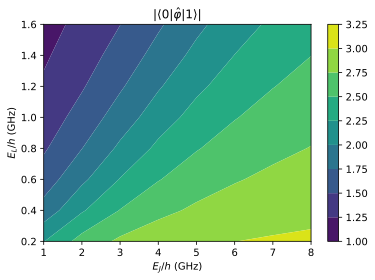

In [15]:
# First, we examine the matrix elements in the meshgrid
# We create a matrix Z that contains the T1 values for all EJ and EL values:
Z = np.ndarray((d,d))
j = 0
X, Y = np.meshgrid(np.linspace(1, EJ_max, d), np.linspace(0.2, 1.6, d))
for EL in np.linspace(0.2, 1.6, d):
    Z[j] = np.abs(get_matr_elem2(EL, EJ_max)) # This is where we call get_matr_elem2
    j += 1
fig, ax = plt.subplots()

CS3 = ax.contourf(X, Y, Z, levels=d)
fig.colorbar(CS3)  # add colorbar
ax.set_xlabel(r'$E_J/h$ (GHz)')
ax.set_ylabel(r'$E_L/h$ (GHz)')
ax.set_title(r'$|\langle 0|\hat{\varphi}|1\rangle|$')
plt.savefig('matrix_elements.jpg', dpi=300)
plt.show()

The numbers correspond to the expected matrix elements for various combinations of EJ and EL. Let's consider what happens along the axes. As we change the potential landscape, the overlap between the two lowest eigenstates changes. As $E_J$ is increased, the cosine term splits the potential well into two wells, bringing the two lowest states closer to each other with same energy but opposite parity, thereby increasing the transition probability. As $E_L$ increases, the well becomes narrower, which separates the eigenstates, lowering the transition amplitude. For a very large $E_J/E_L$ ratio, the matrix element is very large. 

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/8 [00:00<?, ?it/s]

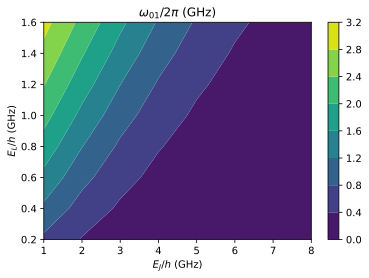

In [16]:
# Next, we examine the omega_01 values in the meshgrid
Z = np.ndarray((d,d))
j = 0
X, Y = np.meshgrid(np.linspace(1, EJ_max, d), np.linspace(0.2, 1.6, d))
for EL in np.linspace(0.2, 1.6, d):
    Z[j] = np.abs(get_omega(EL, EJ_max)) # This is where we call get_omega
    j += 1

# plot
fig, ax = plt.subplots()

CS3 = ax.contourf(X, Y, Z, levels=d)
fig.colorbar(CS3)  # add colorbar
ax.set_xlabel(r'$E_J/h$ (GHz)')
ax.set_ylabel(r'$E_L/h$ (GHz)')
ax.set_title(r'$\omega_{01}/2\pi$ (GHz)')
plt.savefig('omega_01.jpg', dpi=300)

plt.show()

Here we again see that as $E_J$ increases, the energy difference between the two first states decreases as they fall down into each their well. The opposite happens as $E_L$ increases. As the overall well gets narrower, the eigenstates are pushed upwards in the well, increasing the energy difference of the two states. For a specific choice of $E_J=4$, $E_L = 1$ we have

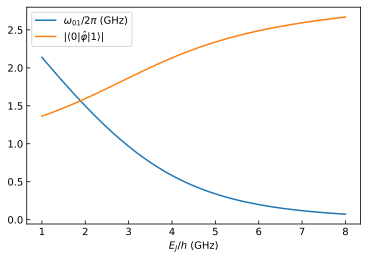

In [154]:
plt.figure()
plt.plot(np.linspace(1,EJ_max,d), get_omega(1, EJ_max), label=r'$\omega_{01}/2\pi$ (GHz)')
plt.plot(np.linspace(1,EJ_max,d), np.abs(get_matr_elem2(1, EJ_max)), label=r'$|\langle 0|\hat{\varphi}|1\rangle|$')
plt.xlabel(r'$E_J/h$ (GHz)')
plt.legend()
plt.tick_params(which='both', direction='in')
plt.show()

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

Spectral data:   0%|          | 0/20 [00:00<?, ?it/s]

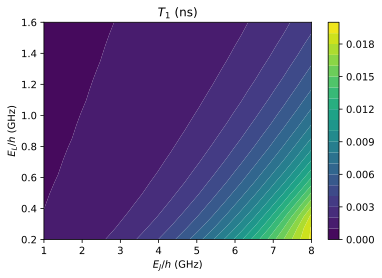

In [17]:
# Finally, we plot the T1 values in the meshgrid
d = 20
Z = np.ndarray((d,d))
j = 0
X, Y = np.meshgrid(np.linspace(1, EJ_max, d), np.linspace(0.2, 1.6, d))
for EL in np.linspace(0.2, 1.6, d):
    Z[j] = T1(get_omega(EL, EJ_max), get_matr_elem2(EL, EJ_max))
    j += 1

# plot
fig, ax = plt.subplots()

CS3 = ax.contourf(X, Y, Z, levels=d)
fig.colorbar(CS3)  # add colorbar
ax.set_xlabel(r'$E_J/h$ (GHz)')
ax.set_ylabel(r'$E_L/h$ (GHz)')
ax.set_title(r'$T_1$ (ns)')
plt.savefig('T1.jpg', dpi=300)
plt.show()

Clearly, this is not what we expected. The pattern, of course, is correct in that the $T_1$-time is $1/\Gamma_{01}^{diel}$, so as the frequency difference goes to zero for large $E_J/E_L$, the $T_1$-time explodes. But the $T_1$-times are way too short as compared to the value obtained from e.g. SCQubits (also in ns):

In [156]:
fluxonium.t1_capacitive(Q_cap=5e6, T=0.020)

1249836.4610407185